In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline 

import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Data Source : https://grouplens.org/datasets/movielens
rating_file_path = '../data/ml-1m/ratings.dat'
movie_file_path = '../data/ml-1m/movies.dat'
user_file_path = '../data/ml-1m/users.dat'

rating_data = pd.io.parsers.read_csv(rating_file_path,
                                    names=['user_id', 'movie_id', 'rating', 'time'],
                                    # 각 데이터는 '::' 구분자로 열을 구분하였다.
                                    delimiter='::')
movie_data = pd.io.parsers.read_csv(movie_file_path,
                                   names=['movie_id', 'title', 'genre'],
                                   delimiter='::')
user_data = pd.io.parsers.read_csv(user_file_path,
                                  names=['user_id', 'gender', 'age', 'occupation', 'zipcode'],
                                  delimiter='::')

In [4]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
# 총 영화의 개수를 출력합니다.
print("total number of movie in data :", len(movie_data['movie_id'].unique()))

# 연도별 영화 개수가 많은 Top 10 연도를 출력합니다.
# 람다식으로 영화 제목 뒤에 따라붙는 연도 정보를 이용한다.
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])
movie_data['year'].value_counts().head(10)

total number of movie in data : 3883


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [11]:
# 가장 많이 등장한 장르의 속성을 추출합니다. (예시: Drama)
unique_genre_dict = {}
# iterrows()는 데이터 프레임의 행을 반복하며 행 자체를 포함하는 객체에 덧붙여 각 행의 색인을 반환하는 제너레이터다. 
for index, row in movie_data.iterrows():
    # genre 피처를 '|' 구분자로 분리합니다.
    genre_combination = row['genre']
    # split(':')처럼 괄호 안에 특정 값이 있을 경우에는 괄호 안의 값을 구분자로 해서 문자열을 나누어 준다. 
    parsed_genre = genre_combination.split("|")
    # 구분자로 분리한 장르의 속성을 unique_genre_dict에 각각 계산하여 저장합니다.
    for genre in parsed_genre:
        # unique_genre_dict 안에 genre과 같은 값이 있으면 참
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1

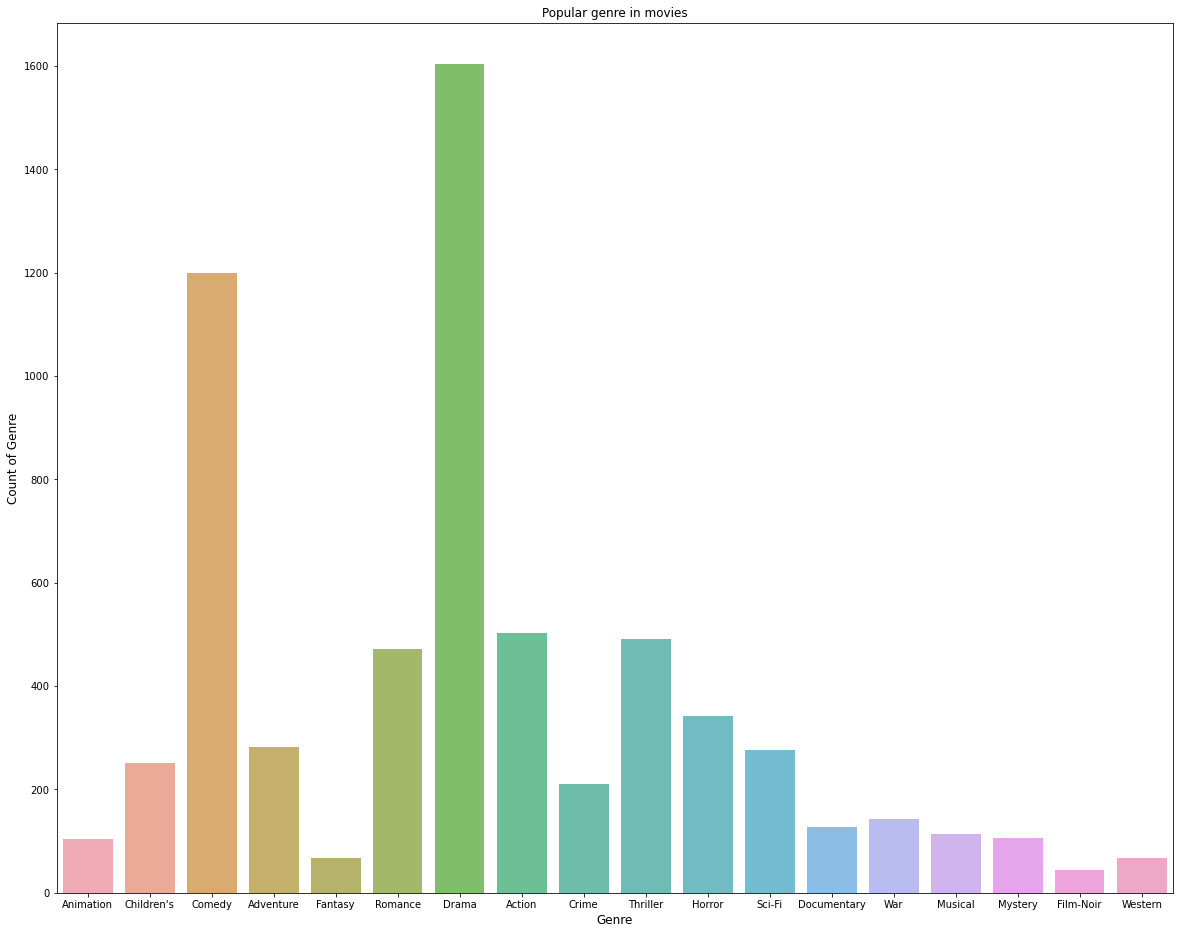

In [15]:
# unique_genre_dict를 이용하여 장르의 속성을 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [20, 16]
# alpha는 색상의 투명도를 지정합니다.
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8) 
plt.title('Popular genre in movies')
plt.ylabel('Count of Genre', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

In [17]:
# 유저 수를 탐색합니다.
print("total number of user in data :", len(user_data['user_id'].unique()))

total number of user in data : 6040


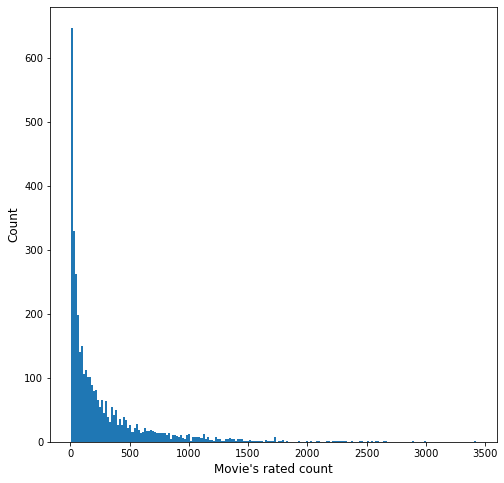

total number of movie in data : 3883
total number of movie rated below 100: 1687


In [18]:
# 각 영화가 평가받은 횟수를 탐색합니다.
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize'] = [8,8]
fig = plt.hist(movie_rate_count, bins=200)
plt.ylabel('Count', fontsize=12)
plt.xlabel("Movie's rated count", fontsize=12)
plt.show()

# 각 영화가 평가받은 회수 출력
print("total number of movie in data :", len(movie_data['movie_id'].unique()))
print("total number of movie rated below 100:", len(movie_rate_count[movie_rate_count < 100]))

In [23]:
# 영화별 평균 평점을 탐색합니다.
# agg() 함수를 이용하면 사용자 정의 함수를 사용하거나, 한 번에 여러개의 집계 결과를 사용할 수 있습니다.
# 영화별 평균 평점을 탐색합니다.
movie_grouped_rating_info = rating_data.groupby("movie_id")['rating'].agg(['count','mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']

In [24]:
movie_grouped_rating_info.head(5)

,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757


<AxesSubplot:>

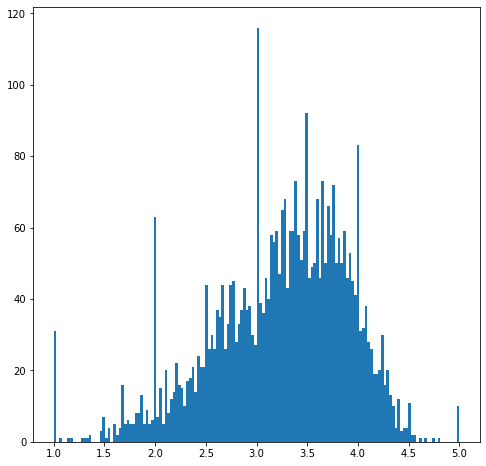

In [25]:
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

In [29]:
# unstack() 함수로 user_id, movie_id를 축으로 하는 데이터를 생성합니다.
# unstack()을 사용하면 group으로 묶여진 데이터를 matrix(행렬) 형태로 전환해줍니다
rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(["user_id", "movie_id"]).unstack()
rating_table.head(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
7           NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
8           4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
9           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10          5.0  5.0  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9         NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  
10        NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

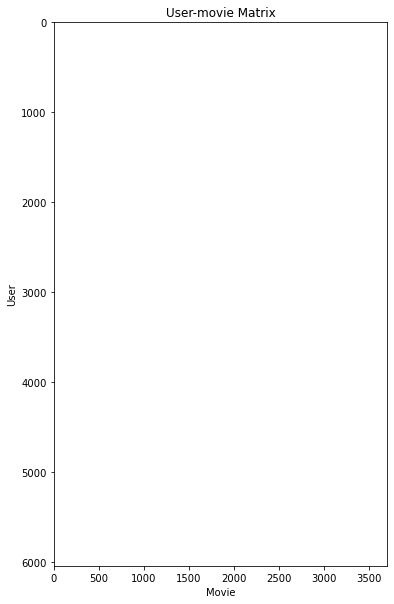

In [32]:
# user-movie 테이블을 시각화합니다.
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel("Movie")
plt.ylabel("User")
plt.title("User-movie Matrix")
plt.show()

In [33]:
!pip install surprise

  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp38-cp38-win_amd64.whl size=743486 sha256=bd5ad92e555f6f6fcd188d064d1fa31a67a01eeee22631af893560635650b484
  Stored in directory: c:\users\lsc11\appdata\local\pip\cache\wheels\20\91\57\2965d4cff1b8ac7ed1b6fa25741882af3974b54a31759e10b6
Successfully built scikit-surprise


In [34]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [35]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성합니다.
reader = Reader(rating_scale=(1,5))
# load_from_df() 는 pandas데이터 프레임으로부터 데이터셋을 로딩하기 위한 메소드이다.
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
# build_full_trainset() : rating 데이터를 surprise 라이브러리의 데이터셋으로 형태를 변환해준다.
train_data = data.build_full_trainset()

# SVD 모델을 학습합니다
train_start = time.time()
model = SVD(n_factors=8,
           lr_all=0.005,
           reg_all=0.02,
           n_epochs=100)
model.fit(train_data)
train_end = time.time()

print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 88.92 seconds


In [36]:
# user_id가 4인 유저의 영화 평가 데이터입니다.
target_user_id = 4
target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data.head(5)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [37]:
# user_id가 4인 유저가 평가한 영화 히스토리 정보를 추출합니다.
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']

print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [39]:
# 타겟 유저(user_id가 4인 유저)가 보지 않은 영화 정보를 테스트 데이터로 생성합니다.
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    # model.test() 함수의 입력데이터인 test_data는 (target_user_id, movie_id, rating) 형태의 리스트여야 한다.
    test_data.append((target_user_id, movie_id, rating))
    
# 타겟 유저의 평점 점수를 예측합니다.
target_user_predictions = model.test(test_data)

In [44]:
# 예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장합니다.
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    # _는 어떤 특정값을 무시하기 위한 용도로 사용된다. 값이 필요하지 않거나 사용되지 않는 값을 _에 할당하기만 하면된다.
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

In [46]:
target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions,
                                                           user_id = target_user_id,
                                                           user_history = target_user_movie_rating_dict)

# target_user_movie_predict_dict에서 예측된 점수 중. 타겟 유저의 Top 10 영화를 선정합니다.
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(),
                                    key=operator.itemgetter(1), reverse=True)[:10]
target_user_top10_predicted

[(106, 5),
 (213, 5),
 (326, 5),
 (527, 5),
 (602, 5),
 (608, 5),
 (615, 5),
 (669, 5),
 (750, 5),
 (858, 5)]

In [47]:
# 타이틀 정보를 출력하기 위해 movie_id마다 movie_title을 딕셔너리 형태로 저장합니다.
movie_dict = {}
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title

# 앞서 계산한 Top 10 영화에 movie_title을 매핑하여 출력합니다.
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ":", predicted_rating)

Nobody Loves Me (Keiner liebt mich) (1994) : 5
Burnt By the Sun (Utomlyonnye solntsem) (1994) : 5
To Live (Huozhe) (1994) : 5
Schindler's List (1993) : 5
Great Day in Harlem, A (1994) : 5
Fargo (1996) : 5
Bread and Chocolate (Pane e cioccolata) (1973) : 5
Aparajito (1956) : 5
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) : 5
Godfather, The (1972) : 5


In [48]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성합니다. 학습 데이터와 테스트 데이터를 8:2로 분할합니다.
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델을 학습합니다
train_start = time.time()
model = SVD(n_factors=8,
           lr_all=0.005,
           reg_all=0.02,
           n_epochs=100)
model.fit(train_data)
train_end = time.time()

print("training time of model: %.2f seconds" % (train_end - train_start)) 

predictions = model.test(test_data)

# 테스트 데이터의 RMSE를 출력합니다.
print("RMSE of test datest in SVD model:")
accuracy.rmse(predictions)

training time of model: 90.63 seconds
RMSE of test datest in SVD model:
RMSE: 0.8600


0.8600100623329033

In [57]:
# 타겟 유저 정보를 테스트 데이터로 생성합니다.
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    if movie_id in target_user_movie_rating_dict:
        rating = target_user_movie_rating_dict[movie_id]
        test_data.append((target_user_id, movie_id, rating))

In [58]:
# 타겟 유저의 평점 점수를 예측합니다.
target_user_predictions = model.test(test_data)

# 예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장합니다.
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

# target_user_movie_predict_dict에서 예측된 점수 중, 타겟 유저의 Top 10 영화를 선정합니다.
target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions, 
                                                            user_id=target_user_id, 
                                                            user_history=target_user_movie_rating_dict)

In [59]:
target_user_movie_predict_dict

{260: 4.172473263490984,
 480: 3.4848975779005373,
 1036: 3.94084195653321,
 1097: 4.2088152908479435,
 1196: 3.9125693913475392,
 1198: 4.375055131059453,
 1201: 4.478942477607479,
 1210: 3.6323914755571467,
 1214: 4.29442758834906,
 1240: 4.08875455177138,
 1387: 4.524005383958625,
 1954: 4.402234216165619,
 2028: 4.763751160753781,
 2366: 3.9322671408733814,
 2692: 4.302074507349666,
 2947: 4.162004909331556,
 2951: 4.293260377397625,
 3418: 4.196362797929713,
 3468: 4.8314266260045216,
 3527: 3.222137798335274,
 3702: 4.003576078688455}

In [60]:
# 실제 평점과의 비교 시각화하기
# 예측 점수와 실제 점수를 영화 타이틀에 매핑합니다.
origin_rating_list = []
predicted_rating_list = []
movie_title_list = []
idx = 0

for movie_id, predicted_rating in target_user_movie_predict_dict.items():
    idx = idx +1
    predicted_rating = round(predicted_rating, 2)
    origin_rating = target_user_movie_rating_dict[movie_id]
    movie_title = movie_dict[movie_id]
    print("movie", str(idx), ":", movie_title, "-", origin_rating, "/", predicted_rating)
    origin_rating_list.append(origin_rating)
    predicted_rating_list.append(predicted_rating)
    movie_title_list.append(str(idx))

movie 1 : Star Wars: Episode IV - A New Hope (1977) - 5 / 4.17
movie 2 : Jurassic Park (1993) - 4 / 3.48
movie 3 : Die Hard (1988) - 4 / 3.94
movie 4 : E.T. the Extra-Terrestrial (1982) - 4 / 4.21
movie 5 : Star Wars: Episode V - The Empire Strikes Back (1980) - 2 / 3.91
movie 6 : Raiders of the Lost Ark (1981) - 5 / 4.38
movie 7 : Good, The Bad and The Ugly, The (1966) - 5 / 4.48
movie 8 : Star Wars: Episode VI - Return of the Jedi (1983) - 3 / 3.63
movie 9 : Alien (1979) - 4 / 4.29
movie 10 : Terminator, The (1984) - 5 / 4.09
movie 11 : Jaws (1975) - 5 / 4.52
movie 12 : Rocky (1976) - 5 / 4.4
movie 13 : Saving Private Ryan (1998) - 5 / 4.76
movie 14 : King Kong (1933) - 4 / 3.93
movie 15 : Run Lola Run (Lola rennt) (1998) - 5 / 4.3
movie 16 : Goldfinger (1964) - 5 / 4.16
movie 17 : Fistful of Dollars, A (1964) - 4 / 4.29
movie 18 : Thelma & Louise (1991) - 4 / 4.2
movie 19 : Hustler, The (1961) - 5 / 4.83
movie 20 : Predator (1987) - 1 / 3.22
movie 21 : Mad Max (1979) - 4 / 4.0


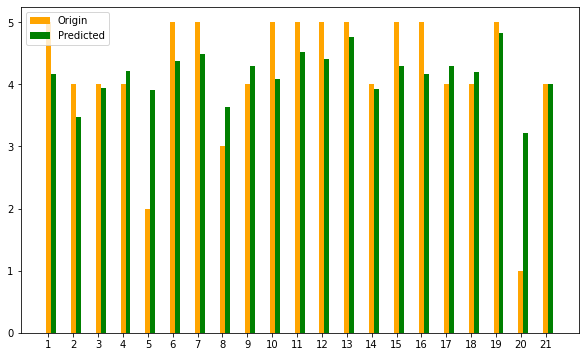

In [63]:
# 실제 점수와 예측 점수를 리스트로 추출합니다.
origin = origin_rating_list
predicted = predicted_rating_list

# 영화의 개수만큼 막대 그래프의 index 개수를 생성합니다.
plt.rcParams['figure.figsize'] = (10,6)
index = np.arange(len(movie_title_list))
bar_width = 0.2

# 실제 점수와 예측 점수를 bar 그래프로 출력합니다.
rects1 = plt.bar(index, origin, bar_width, 
                color='orange',
                label='Origin')
rects2 = plt.bar(index + bar_width, predicted, bar_width,
                color="green",
                label='Predicted')
# x축 눈금 값 설정 또는 쿼리
plt.xticks(index, movie_title_list)
plt.legend()
plt.show()